
Лабораторная работа 4.2
Вариант 2:

Краевая задача: x*y'' + 2*y' -x*y = 0
y'(1) = -2*exp^(-1)
y(2) = exp^(-2)/2
Точное решение: y(x) = e^(-x)/x

Интервал: [1, 2]
y0 = -0.7357588823428847, y1 = 0.06766764161830635

Текущий шаг: 0.1

Метод стрельбы:
x: 1.0, y: -0.73576
x: 1.1, y: -0.57377
x: 1.2, y: -0.44403
x: 1.3, y: -0.33836
x: 1.4, y: -0.25093
x: 1.5, y: -0.17749
x: 1.6, y: -0.11491
x: 1.7, y: -0.06076
x: 1.8, y: -0.01321
x: 1.9, y: 0.02921
x: 2.0, y: 0.06767


Конечно-разностный метод:
x: 1.0, y: 0.36341
x: 1.1, y: 0.28983
x: 1.2, y: 0.23227
x: 1.3, y: 0.18749
x: 1.4, y: 0.1529
x: 1.5, y: 0.12641
x: 1.6, y: 0.10634
x: 1.7, y: 0.09138
x: 1.8, y: 0.08046
x: 1.9, y: 0.07277
x: 2.0, y: 0.06767

Текущий шаг: 0.05

Метод стрельбы:
x: 1.0, y: -0.73576
x: 1.05, y: -0.65009
x: 1.1, y: -0.57376
x: 1.15, y: -0.50544
x: 1.2, y: -0.44403
x: 1.25, y: -0.38859
x: 1.3, y: -0.33835
x: 1.35, y: -0.29265
x: 1.4, y: -0.25092
x: 1.45, y: -0.21267
x: 1.5, y: -0.17749
x: 1.55, y: -0.14501
x: 1.6, y: -0.1

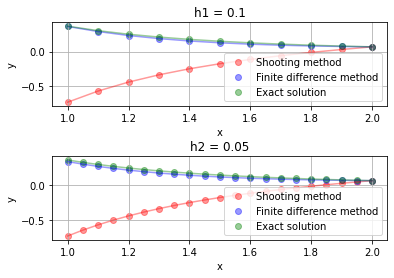

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from NM_4_1 import rungeKutt


target = '''
Краевая задача: x*y'' + 2*y' -x*y = 0
y'(1) = -2*exp^(-1)
y(2) = exp^(-2)/2
Точное решение: y(x) = e^(-x)/x
'''

def func(x, y, y_der):
    return (x*y-2*y_der)/x

def g(x, y, k):
    return k

def p(x):
    return 2

def q(x):
    return -x

def pureFunction(x):
    return math.exp(-x)/x

def f(x):
    return 0

def first(x, y, x0):
    i = 0
    while i < len(x) - 1 and x[i + 1] < x0:
        i += 1
    return (y[i + 1] - y[i]) / (x[i + 1] - x[i])

def stop(y, y1, eps):
    if abs(y[-1] - y1) > eps:
        return True
    else:
        return False

def newN(n_last, n, ans_last, ans, b, y1):
    x, y = ans_last[0], ans_last[1]
    phi_last = y[-1] - y1
    x, y = ans[0], ans[1]
    phi = y[-1] - y1
    return n - (n - n_last) / (phi - phi_last) * phi

def shootingMethod(a, b, y0, y1, h, eps):
    n_last = 1
    n = 0.8
    y_der = n_last
    ans_last = rungeKutt(func, a, b, h, n_last, y_der)[:2]
    y_der = n
    ans = rungeKutt(func, a, b, h, n, y_der)[:2]

    while stop(ans[1], y1, eps):
        n, n_last = newN(n_last, n, ans_last, ans, b, y1), n
        ans_last = ans
        y_der = n
        ans = rungeKutt(func, a, b, h, y0, y_der)[:2]

    return ans

def tma(a, b, c, d, shape):
    p = [-c[0] / b[0]]
    q = [d[0] / b[0]]
    x = [0] * (shape + 1)
    for i in range(1, shape):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    for i in reversed(range(shape)):
        x[i] = p[i] * x[i + 1] + q[i]
    return x[:-1]

def finiteDifferenceMethod(a, b, alpha, beta, delta, gamma, y0, y1, h):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    A = [0] + [1 - p(x[i]) * h / 2 for i in range(0, n - 1)] + [-gamma]
    B = [alpha * h - beta] + [q(x[i]) * h ** 2 - 2 for i in range(0, n - 1)] + [delta * h + gamma]

    C = [beta] + [1 + p(x[i]) * h / 2 for i in range(0, n - 1)] + [0]
    D = [y0 * h] + [f(x[i]) * h ** 2 for i in range(0, n - 1)] + [y1 * h]

    y = tma(A, B, C, D, len(A))
    return x, y

def show(ans, exact, h):
    n = len(ans)
    for i in range(n):
        plt.subplot(n, 1, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.6)
        plt.scatter(ans[i]["Shooting"]["x"], ans[i]["Shooting"]["y"], color='r', alpha=0.4, label='Shooting method')
        plt.plot(ans[i]["Shooting"]["x"], ans[i]["Shooting"]["y"], color='r', alpha=0.4)
        plt.scatter(ans[i]["FD"]["x"], ans[i]["FD"]["y"], color='b', alpha=0.4, label='Finite difference method')
        plt.plot(ans[i]["FD"]["x"], ans[i]["FD"]["y"], color='b', alpha=0.4)
        plt.scatter(exact[i][0], exact[i][1], color='g', alpha=0.4, label='Exact solution')
        plt.plot(exact[i][0], exact[i][1], color='g', alpha=0.4)

        plt.legend(loc='best')
        plt.title('h{0} = '.format(i + 1) + str(h[i]))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
    plt.savefig('ShootAndFD.png')
    plt.show()

def rungeRomberg(ans, exact):
    k = ans[0]['h'] / ans[1]['h']
    Y1 = [yi for xi, yi in zip(ans[0]['Shooting']['x'], ans[0]['Shooting']['y']) if xi in ans[1]['Shooting']['x']]
    Y2 = [yi for xi, yi in zip(ans[1]['Shooting']['x'], ans[1]['Shooting']['y']) if xi in ans[0]['Shooting']['x']]
    shoot_err = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in ans[0]['Shooting']['x'] if xi in ans[1]['Shooting']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(shoot_err)):
        shoot_err[i] = abs(shoot_err[i] - Y_ex[i])

    Y1 = [yi for xi, yi in zip(ans[0]['FD']['x'], ans[0]['FD']['y']) if xi in ans[1]['FD']['x']]
    Y2 = [yi for xi, yi in zip(ans[1]['FD']['x'], ans[1]['FD']['y']) if xi in ans[0]['FD']['x']]
    fd_err = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in ans[0]['FD']['x'] if xi in ans[1]['FD']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(fd_err)):
        fd_err[i] = abs(fd_err[i] - Y_ex[i])

    return {'Shooting': shoot_err, 'FD': fd_err}

def sse(f, y):
    return round(sum([(f_i - y_i) ** 2 for f_i, y_i in zip(f, y)]), 5)

if __name__ == '__main__':
    print('\nЛабораторная работа 4.2\nВариант 2:')
    print(target)

    a = 1
    b = 2
    alpha = 0
    delta = 1
    gamma = 0
    beta = 1
    y0 = -2*pureFunction(a)
    y1 = pureFunction(b)
    step = 0.1
    eps = 1e-5

    print(f'Интервал: [{a}, {b}]')
    print(f'y0 = {y0}, y1 = {y1}')
    print()

    res = []
    res2 = []
    ans = []
    steps = [step, step / 2]
    i = 0

    for h in steps:
        print(f'Текущий шаг: {h}')
        print('\nМетод стрельбы:')
        res.append(shootingMethod(a, b, y0, y1, h, eps))
        for x, y in zip(res[i][0], res[i][1]):
            print(f'x: {round(x, 5)}, y: {round(y, 5)}')
        print()

        print('\nКонечно-разностный метод:')
        res2.append(finiteDifferenceMethod(a, b, alpha, beta, delta, gamma, y0, y1, h))
        for x, y in zip(res2[i][0], res2[i][1]):
            print(f'x: {round(x, 5)}, y: {round(y, 5)}')
        print()

        ans.append({
            "h": h,
            "Shooting": {'x': res[i][0],  'y': res[i][1]},
            "FD":       {'x': res2[i][0], 'y': res2[i][1]}
        })

        i += 1

    exact = []
    for h in steps:
        x_ex = [i for i in np.arange(a, b + h, h)]
        y_ex = [pureFunction(i) for i in x_ex]
        exact.append((x_ex, y_ex))

    err = rungeRomberg(ans, exact)
    print('\nПогрешности метода стрельбы: {}'.format(err['Shooting']))
    print('\nПогрешности конечно-разностного метода: {}'.format(err['FD']))
    show(ans, exact, steps)